# Bharath Intern


# NAME: YANNAMANI VENKATA SURYA PRAKASH

# Task 3: Handwritten Digit Recognition Using MNIST Dataset With The Help Of Neural Network.

# Dataset Used : MNIST Dataset

# About Dataset

MNIST is a commonly used dataset in machine learning and computer vision research, which consists of a set of 70,000 images of handwritten digits (0-9), each of size 28x28 pixels. The dataset is split into two sets: a training set of 60,000 images and a test set of 10,000 images. The training set is used to train a machine learning model, while the test set is used to evaluate the model's performance.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [3]:
# To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

The Above Code Reflects that the Dataset Contains :

1.An array of 60,000 images, each represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255

2.An array of 60,000 labels, each representing the correct digit (0-9) for the 1.

3.An array of 10,000 images, each represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255.

4.An array of 10,000 labels, each representing the correct digit (0-9) for the 3.

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:

print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [8]:
# Reshaping the input Data which is used as a input in CNN in Tenserflow
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [9]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


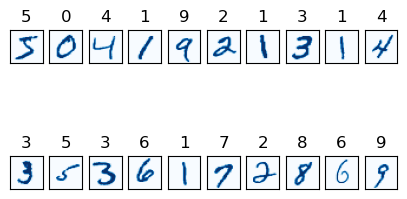

In [11]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [12]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [14]:
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.08976043,  0.50111365,  0.13444303, -0.7077266 , -0.8345008 ,
        -0.28539822,  0.43872795, -0.58982205,  0.21606618,  0.02484008]],
      dtype=float32)

In [17]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.11006887, 0.16607831, 0.11509856, 0.04958157, 0.04367802,
        0.07563715, 0.15603398, 0.05578604, 0.12488733, 0.10315017]],
      dtype=float32)

In [18]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [19]:
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2990 - accuracy: 0.9131
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1457 - accuracy: 0.9564
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1093 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0913 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0771 - accuracy: 0.9761


In [20]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0787 - accuracy: 0.9759 - 2s/epoch - 5ms/step


[0.07867441326379776, 0.9758999943733215]

In [21]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.0303838e-09, 1.2985718e-09, 2.1079974e-05, 1.3402128e-04,
        7.0940823e-13, 1.3818401e-07, 1.9030276e-13, 9.9984455e-01,
        8.9624656e-08, 1.5220391e-07],
       [1.9291142e-04, 1.8953919e-04, 9.9956661e-01, 2.3746134e-05,
        2.1399728e-15, 5.6517774e-06, 7.2808029e-06, 2.0584524e-10,
        1.4341860e-05, 6.6803833e-11],
       [1.3256165e-06, 9.9382907e-01, 1.0161325e-04, 2.2710721e-05,
        1.1821104e-04, 1.0703526e-05, 9.7205893e-06, 5.1593920e-03,
        7.2220422e-04, 2.5041116e-05],
       [9.9998689e-01, 2.5600471e-11, 1.8629796e-06, 6.6546417e-09,
        2.4829983e-10, 2.2654693e-07, 3.6595020e-06, 7.1845329e-06,
        1.4405239e-09, 2.6195531e-07],
       [8.4755362e-07, 1.7663321e-10, 1.1710310e-05, 2.1584727e-08,
        9.9827111e-01, 2.3463654e-06, 1.3055549e-05, 1.9334933e-05,
        4.7181024e-07, 1.6812121e-03]], dtype=float32)>

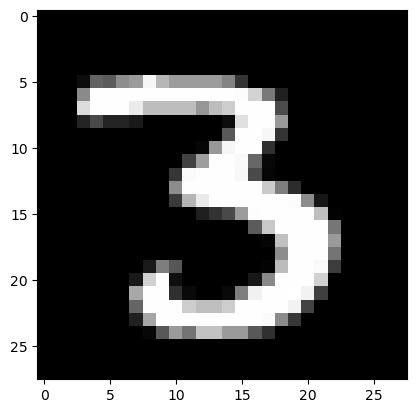

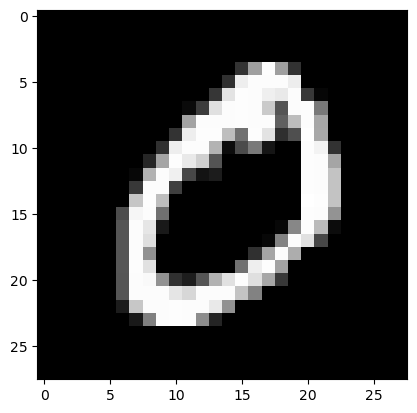

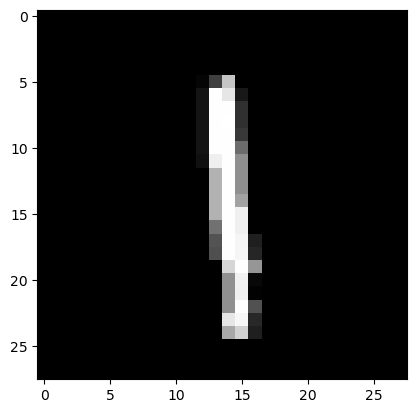

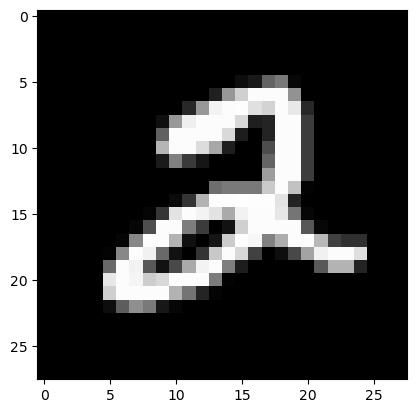

In [25]:
# Displaying a Grayscale Image
img = x_train[12]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()
img1 = x_train[1]
plt.imshow(np.squeeze(img1) ,cmap='gray')
plt.show()
img2 = x_train[8]
plt.imshow(np.squeeze(img2) ,cmap='gray')
plt.show()
img3 = x_train[5]
plt.imshow(np.squeeze(img3) ,cmap='gray')
plt.show()

In [26]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))
img1= img1.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img1])
print("predicted : {}".format(argmax(p)))
img2= img2.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img2])
print("predicted : {}".format(argmax(p)))
img3= img3.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img3])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 48ms/step
predicted : 3
1/1 [==============================] - 0s 153ms/step
predicted : 0
1/1 [==============================] - 0s 56ms/step
predicted : 1
1/1 [==============================] - 0s 50ms/step
predicted : 2


#                                   THE END 